In [1]:
# Importe
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report

In [2]:
song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')

In [3]:
song_data = song_data[["Genre","Lyrics","song_text_processed","Text_Length"]]
song_data = song_data.groupby('Genre').sample(1000).reset_index(drop=True)

### Textlänge

Genre
Hip-Hop       2477.853
Pop           1507.902
R&B           1264.486
Electronic    1076.491
Metal         1056.949
Rock          1029.350
Folk           998.486
Indie          969.509
Country        923.742
Jazz           830.807
Name: Text_Length, dtype: float64


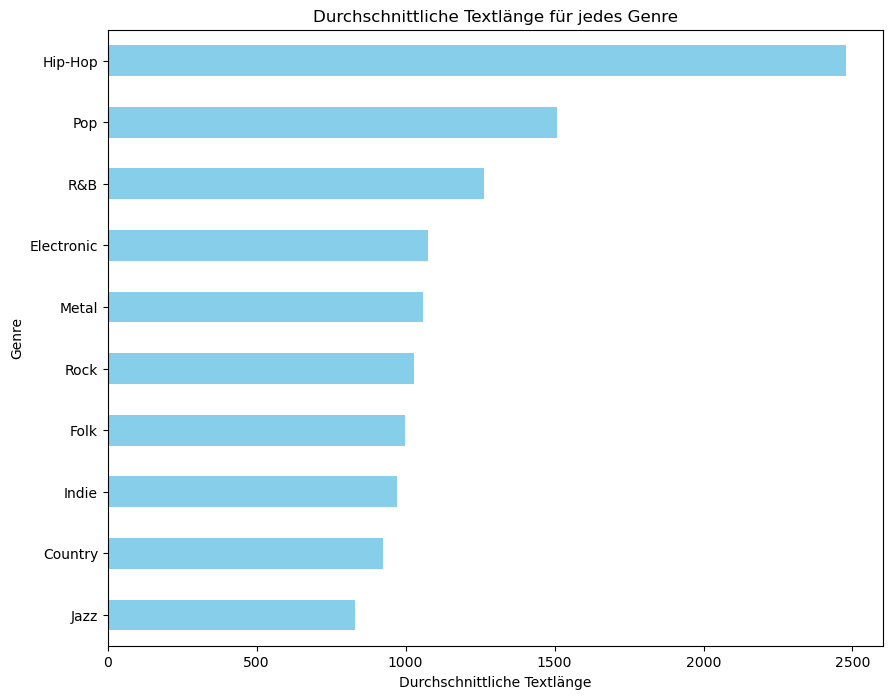

In [4]:
# Berechne die durchschnittliche Textlänge für jedes Genre
average_text_length_per_genre = song_data.groupby('Genre')['Text_Length'].mean().sort_values(ascending=False)


# Ausgabe der durchschnittlichen Textlängen für jedes Genre
print(average_text_length_per_genre)

plt.figure(figsize=(10, 8))
average_text_length_per_genre.plot(kind='barh', color='skyblue')
plt.title('Durchschnittliche Textlänge für jedes Genre')
plt.xlabel('Durchschnittliche Textlänge')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Kehre die Reihenfolge auf der Y-Achse um, damit das Genre mit der längsten durchschnittlichen Textlänge oben ist
plt.show()


c:\Users\sdo\AppData\Local\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sdo\AppData\Local\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sdo\AppData\Local\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


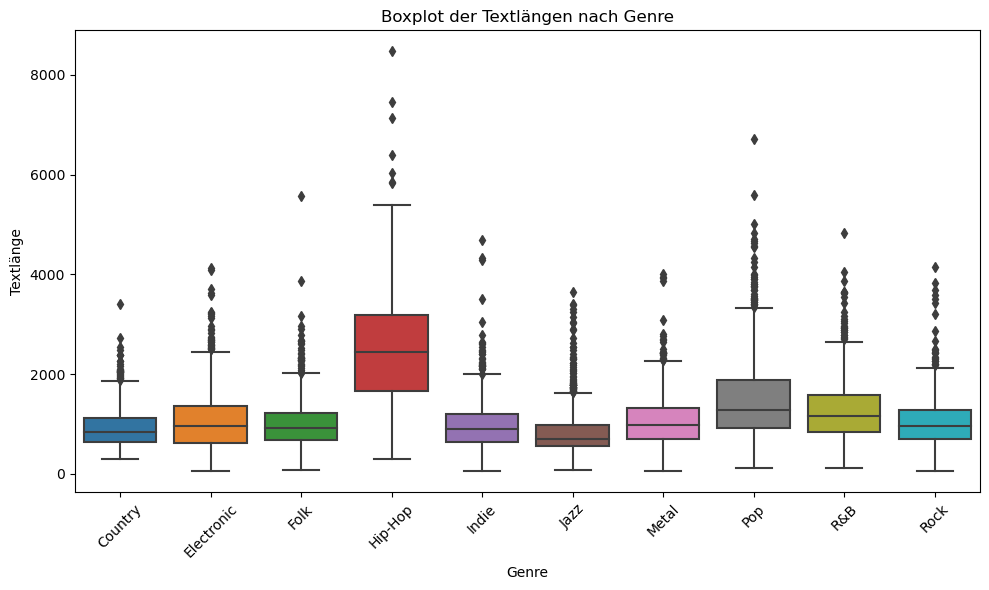

In [5]:
# Angenommen, du hast eine pandas DataFrame namens song_data
# mit den Spalten 'Genre' und 'Text_Length'

# Erstellen der Boxplots
plt.figure(figsize=(10, 6)) # Größe des Plots anpassen
sns.boxplot(x='Genre', y='Text_Length', data=song_data)

plt.title('Boxplot der Textlängen nach Genre') # Titel hinzufügen
plt.xticks(rotation=45) # Dreht die Genre-Namen auf der X-Achse, falls nötig
plt.ylabel('Textlänge') # Y-Achsen-Beschriftung
plt.xlabel('Genre') # X-Achsen-Beschriftung

plt.tight_layout() # Sorgt dafür, dass alle Beschriftungen im Plot sichtbar sind
plt.show() # Zeigt den Plot an


### Anzahl der Satzzeichen

Genre
Hip-Hop       92.919000
Pop           50.406406
R&B           41.063000
Electronic    32.011000
Rock          29.933934
Metal         28.058000
Jazz          25.689000
Folk          24.977000
Indie         24.685000
Country       22.621000
Name: punctuation_count, dtype: float64


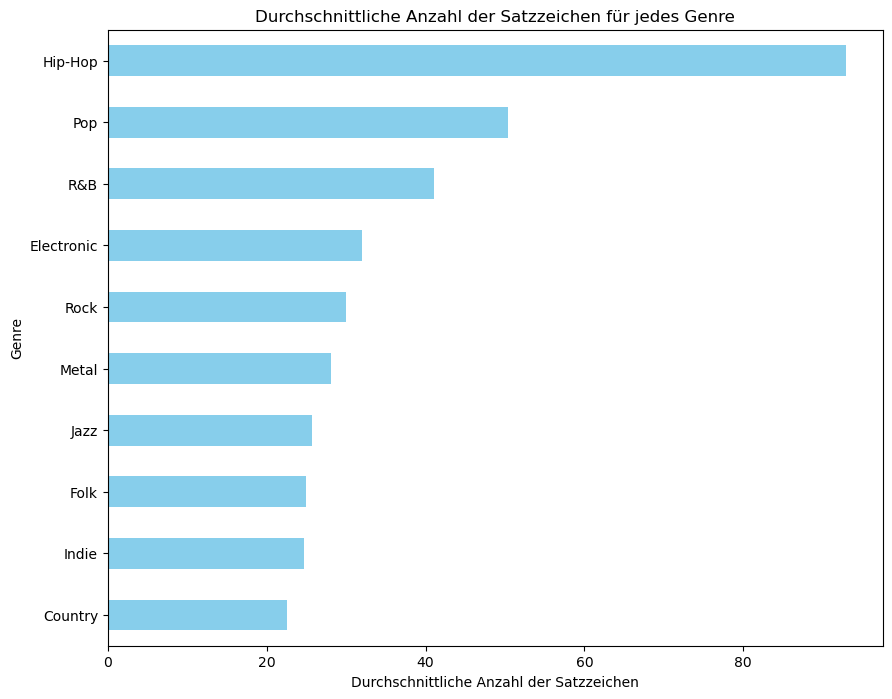

In [16]:
# Angenommen, 'unprocessed_lyrics' ist die Spalte mit den unverarbeiteten Songtexten

# Schritt 1: Definiere eine Funktion, die die Anzahl der Satzzeichen in einem Text zählt
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Schritt 2: Wende diese Funktion auf jeden Songtext an, um die Anzahl der Satzzeichen zu zählen
song_data['punctuation_count'] = song_data['Lyrics'].apply(count_punctuation)

# Schritt 3: Berechne die durchschnittliche Anzahl von Satzzeichen für jedes Genre
average_punctuation_per_genre = song_data.groupby('Genre')['punctuation_count'].mean().sort_values(ascending=False)

# Entferne alle Lieder mit mehr als 2000 Satzzeichen
filtered_song_data = song_data[song_data['punctuation_count'] <= 2000]

# Berechne die durchschnittliche Anzahl von Satzzeichen für jedes Genre in den gefilterten Daten
average_punctuation_per_genre = filtered_song_data.groupby('Genre')['punctuation_count'].mean().sort_values(ascending=False)

# Ausgabe der durchschnittlichen Anzahl von Satzzeichen für jedes Genre
print(average_punctuation_per_genre)

# Erstelle einen horizontalen Balkendiagramm zur Visualisierung
plt.figure(figsize=(10, 8))
average_punctuation_per_genre.plot(kind='barh', color='skyblue')
plt.title('Durchschnittliche Anzahl der Satzzeichen für jedes Genre')
plt.xlabel('Durchschnittliche Anzahl der Satzzeichen')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Kehre die Reihenfolge auf der Y-Achse um, damit das Genre mit der längsten durchschnittlichen Textlänge oben ist
plt.show()

c:\Users\sdo\AppData\Local\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sdo\AppData\Local\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sdo\AppData\Local\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


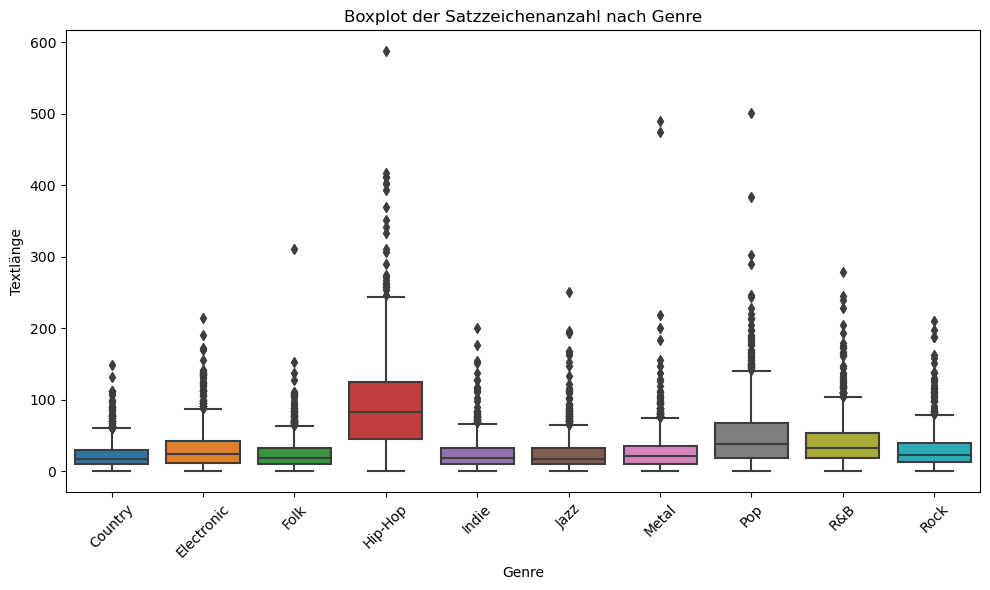

In [23]:
# Erstellen der Boxplots
plt.figure(figsize=(10, 6)) # Größe des Plots anpassen
sns.boxplot(x='Genre', y='punctuation_count', data=filtered_song_data)

plt.title('Boxplot der Satzzeichenanzahl nach Genre') # Titel hinzufügen
plt.xticks(rotation=45) # Dreht die Genre-Namen auf der X-Achse, falls nötig
plt.ylabel('Textlänge') # Y-Achsen-Beschriftung
plt.xlabel('Genre') # X-Achsen-Beschriftung

plt.tight_layout() # Sorgt dafür, dass alle Beschriftungen im Plot sichtbar sind
plt.show() # Zeigt den Plot an

### Art des Satzzeichens

In [24]:
def count_punctuation_types(text):
    punctuation_counts = Counter(char for char in text if char in string.punctuation)
    return punctuation_counts

# Beispielannahme: song_data ist deine DataFrame und enthält Spalten 'Genre' und 'unprocessed_lyrics'

# Wende die Funktion an und erstelle eine neue Spalte für die Zählung der Satzzeichenarten
song_data['punctuation_counts'] = song_data['Lyrics'].apply(count_punctuation_types)

# Initialisiere ein Dictionary, um die aggregierten Zählungen für jedes Genre zu speichern
aggregated_counts_per_genre = {genre: Counter() for genre in song_data['Genre'].unique()}

# Aggregiere die Zählungen für jedes Genre
for _, row in song_data.iterrows():
    aggregated_counts_per_genre[row['Genre']].update(row['punctuation_counts'])

# Berechne die Anzahl der Songs pro Genre
songs_per_genre = song_data['Genre'].value_counts()

# Berechne die durchschnittlichen Zählungen
average_counts_per_genre = {}
for genre, counts in aggregated_counts_per_genre.items():
    average_counts = {punct: count / songs_per_genre[genre] for punct, count in counts.items()}
    average_counts_per_genre[genre] = average_counts

# Optional: Ausgabe der durchschnittlichen Zählungen für jedes Genre
for genre, counts in average_counts_per_genre.items():
    print(f"Genre: {genre}")
    for punct, avg_count in counts.items():
        print(f"  {punct}: {avg_count:.2f}")
    print("\n")

Genre: Country
  ': 12.68
  ,: 5.20
  ": 0.35
  [: 0.27
  -: 0.50
  ]: 0.27
  .: 1.72
  &: 0.01
  (: 0.42
  ): 0.41
  :: 0.10
  ?: 0.43
  !: 0.13
  /: 0.02
  `: 0.01
  ;: 0.05
  $: 0.00
  +: 0.00
  *: 0.01
  #: 0.02
  _: 0.01


Genre: Electronic
  ,: 9.84
  .: 3.23
  ': 11.77
  ?: 1.16
  -: 1.49
  (: 1.11
  ): 1.11
  ;: 0.10
  !: 0.84
  :: 0.23
  [: 0.28
  ]: 0.28
  *: 0.05
  /: 0.03
  ": 0.30
  &: 0.07
  `: 0.06
  >: 0.00
  <: 0.00
  _: 0.06
  $: 0.01
  ~: 0.00


Genre: Folk
  ': 10.22
  -: 0.93
  ,: 7.83
  ": 0.65
  .: 2.38
  ?: 0.97
  (: 0.48
  ): 0.47
  :: 0.11
  !: 0.32
  [: 0.23
  ]: 0.23
  /: 0.00
  ^: 0.00
  &: 0.01
  ;: 0.08
  ~: 0.00
  `: 0.04
  *: 0.01
  =: 0.01


Genre: Hip-Hop
  ': 32.15
  -: 3.93
  !: 1.85
  ,: 30.20
  [: 2.08
  ]: 2.08
  (: 4.10
  ): 4.11
  ?: 3.15
  .: 5.35
  ": 1.73
  :: 0.78
  &: 0.13
  *: 0.58
  >: 0.02
  _: 0.02
  ;: 0.11
  {: 0.07
  }: 0.07
  /: 0.22
  +: 0.04
  =: 0.00
  #: 0.01
  $: 0.04
  @: 0.00
  ^: 0.01
  `: 0.07
  ~: 0.01
  %: 0.01


Genre: 

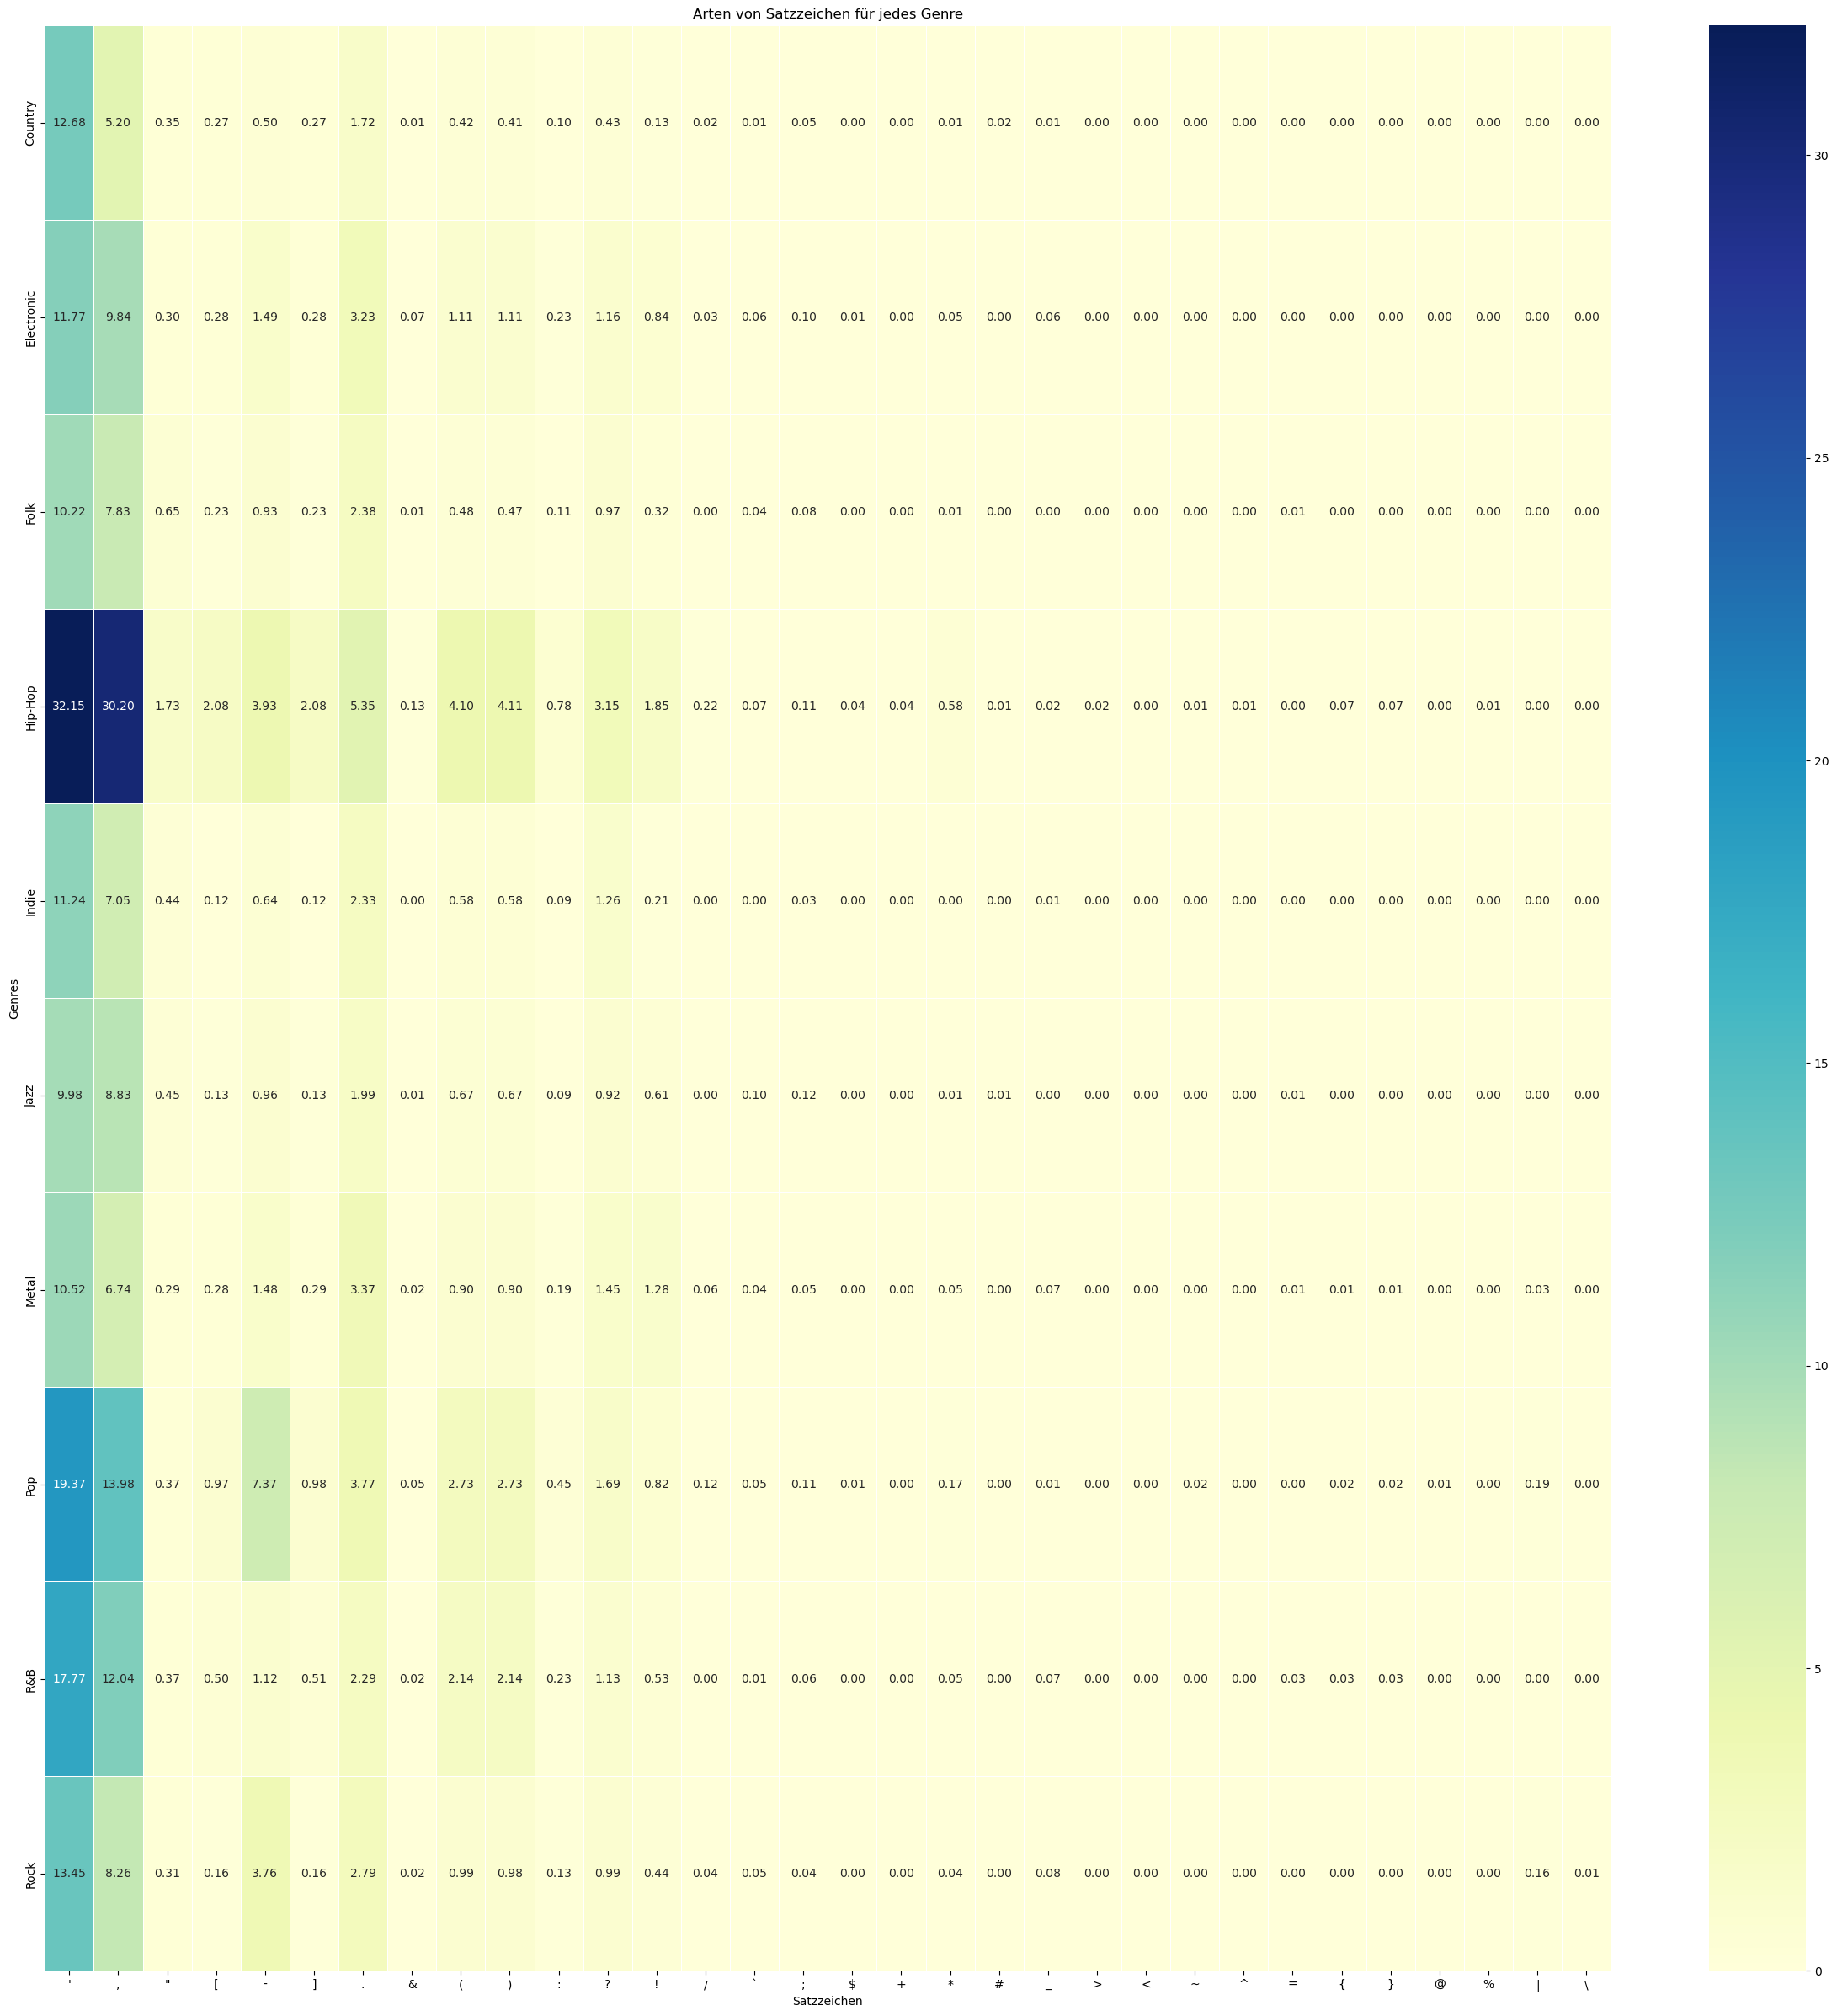

In [27]:
# Konvertiere das Dictionary der durchschnittlichen Zählungen in einen DataFrame
df_average_counts = pd.DataFrame.from_dict(average_counts_per_genre, orient='index').fillna(0)

plt.figure(figsize=(30, 30))
sns.heatmap(df_average_counts, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Arten von Satzzeichen für jedes Genre')
plt.xlabel('Satzzeichen')
plt.ylabel('Genres')
plt.show()

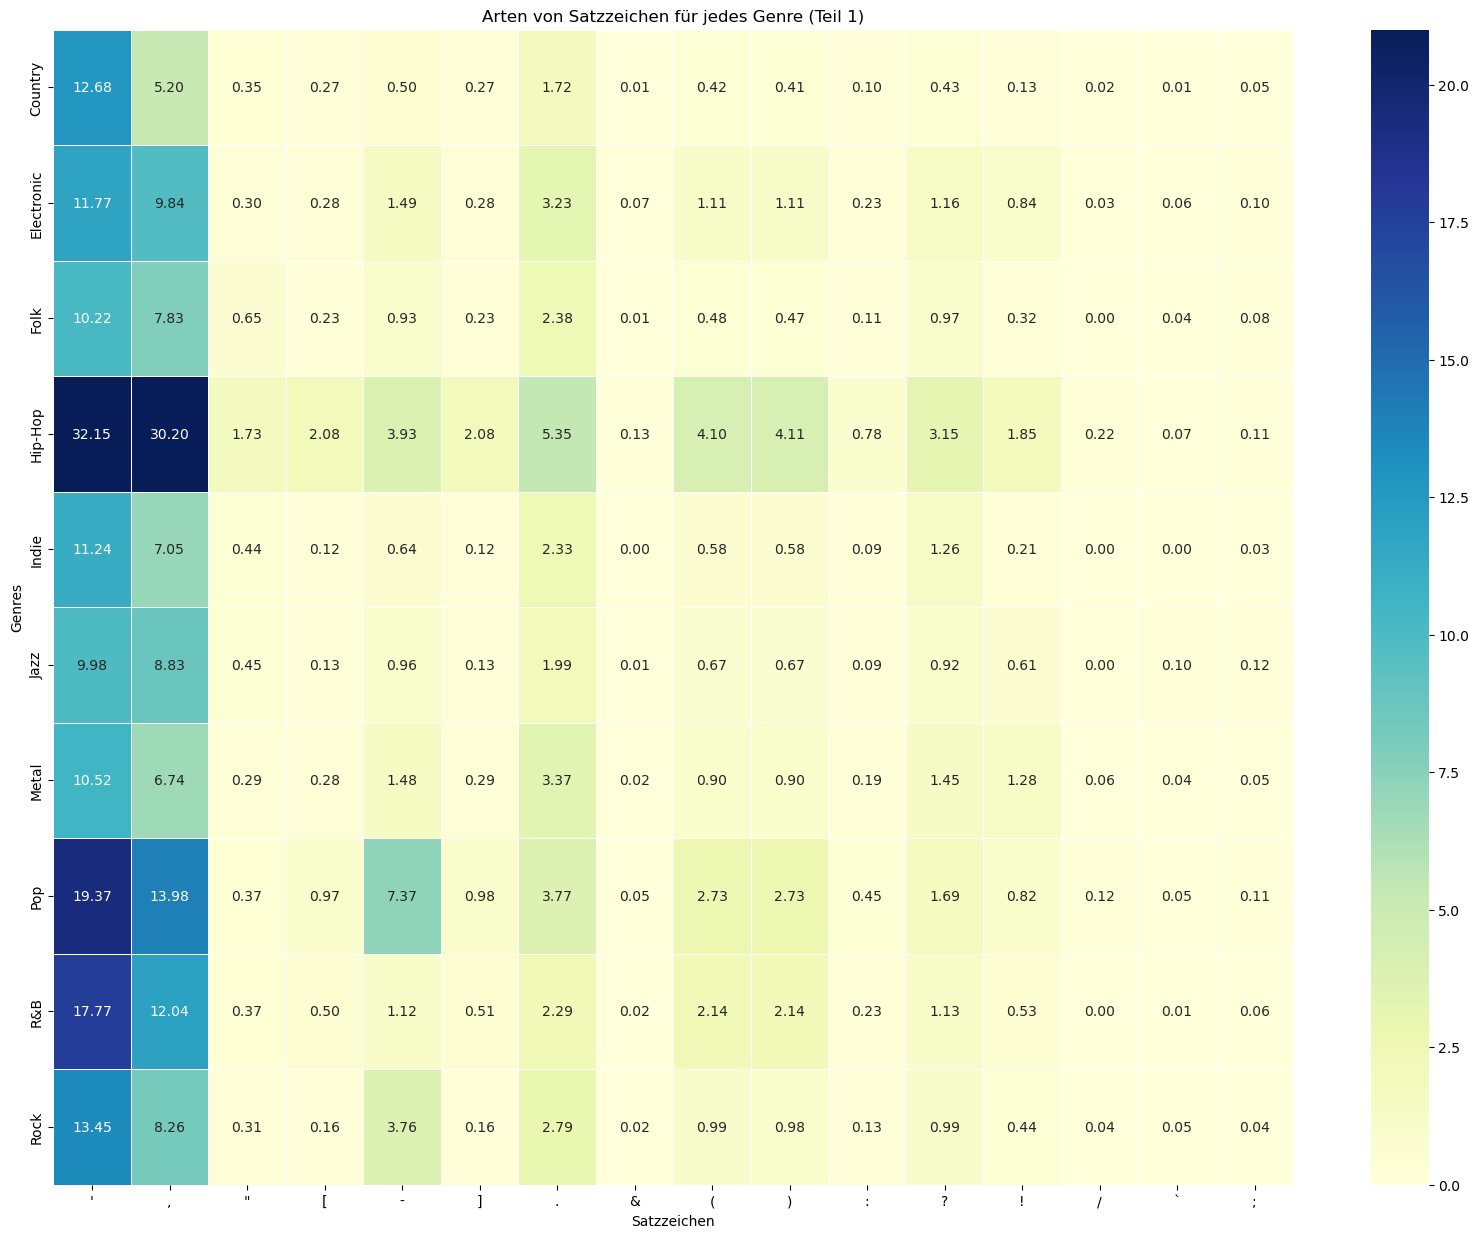

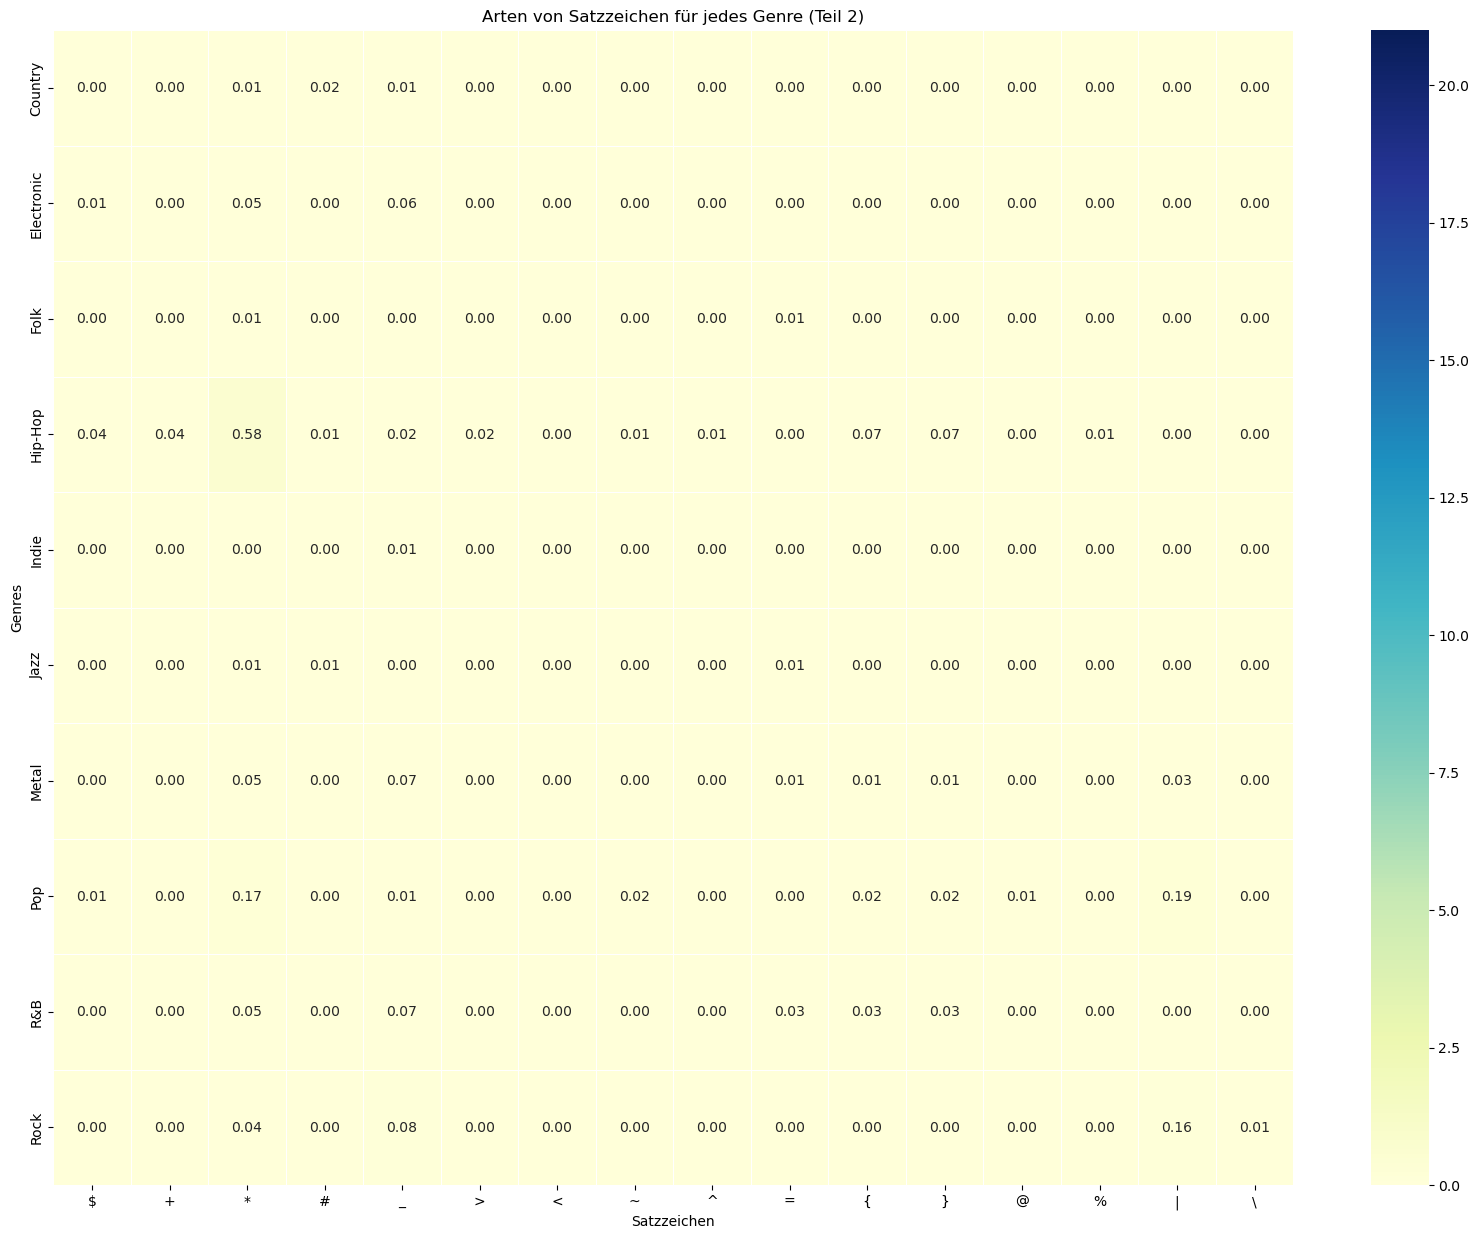

In [33]:
vmin = df_average_counts.min().min()  # Minimalwert im gesamten DataFrame
vmax = df_average_counts.max().max()  # Maximalwert im gesamten DataFrame

# Teile die Spalten des DataFrames in zwei Hälften
midpoint = len(df_average_counts.columns) // 2
left_columns = df_average_counts.columns[:midpoint]
right_columns = df_average_counts.columns[midpoint:]

# Erstelle zwei separate DataFrames
df_left = df_average_counts[left_columns]
df_right = df_average_counts[right_columns]

# Erstelle das erste Heatmap-Diagramm mit festgelegtem Wertebereich
plt.figure(figsize=(20, 15))
sns.heatmap(df_left, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, vmin=0, vmax=21)
plt.title('Arten von Satzzeichen für jedes Genre (Teil 1)')
plt.xlabel('Satzzeichen')
plt.ylabel('Genres')
plt.show()

# Erstelle das zweite Heatmap-Diagramm mit demselben Wertebereich
plt.figure(figsize=(20, 15))
sns.heatmap(df_right, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, vmin=0, vmax=21)
plt.title('Arten von Satzzeichen für jedes Genre (Teil 2)')
plt.xlabel('Satzzeichen')
plt.ylabel('Genres')
plt.show()